In [4]:
import importlib
import utilities.functions as functions
import pandas as pd
importlib.reload(functions)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json



from utilities.functions import (
    retidos,
    calcula_viabilidade,
    analisar_retencao,


)

In [5]:
publico_janeiro_dezembro = pd.read_parquet("../dados/gold/publico_janeiro_dezembro.parquet")

In [6]:
publico_janeiro_dezembro.head(10)

,customer_id,is_target,order_created_month,num_pedidos_mes,num_pedidos_hist,total_amount_mes,ticket_medio
0,ffffeda85b466b48195c356f8b97f21d0b23958d5815fc...,target,12,1,2,167.0,167.000000
1,ffffeda85b466b48195c356f8b97f21d0b23958d5815fc...,target,1,1,2,167.0,167.000000
2,ffffe95dc11472a22c46b6d5cdc5c14cf40e0c88a601e0...,target,12,2,4,209.0,104.500000
3,ffffe95dc11472a22c46b6d5cdc5c14cf40e0c88a601e0...,target,1,2,4,209.0,104.500000
4,ffffe50aaaed54af0eb463fcc6761b0e17a1d1cdd6b8e1...,control,12,1,2,55.6,55.600000
5,ffffe50aaaed54af0eb463fcc6761b0e17a1d1cdd6b8e1...,control,1,1,2,55.6,55.600000
6,ffffdfae8a70b042a8f86763f59024f61899d6f30dec60...,target,12,1,2,22.8,22.800000
7,ffffdfae8a70b042a8f86763f59024f61899d6f30dec60...,target,1,1,2,22.8,22.800000
8,ffffd512938c9c6a7fc101b6bc044c2bc542505ceff2a5...,control,12,2,8,53.3,26.650000
9,ffffd512938c9c6a7fc101b6bc044c2bc542505ceff2a5...,control,1,6,8,187.4,31.233333


Calculando retencao considerando dois ou + pedidos

In [9]:
df_1,clientes_retidos_1=retidos(publico_janeiro_dezembro, mes0=12, mes1=1,pedidos=1)
print(clientes_retidos_1)

           retidos    base  taxa_retencao
is_target                                
control     143862  241457       0.595808
target      215348  312919       0.688191


In [10]:
retencao_pedido_1=analisar_retencao(df_1)
retencao_pedido_1

{'target_retencao': 0.688191,
 'control_retencao': 0.595808,
 'lift_absoluto': 0.092383,
 'lift_relativo_percent': 15.51,
 'target_success': 215348,
 'target_total': 312919,
 'control_success': 143862,
 'control_total': 241457,
 'z_stat': 71.409089,
 'p_value': 0.0,
 'significativo': True}

Calculando retencao considerando tres ou + pedidos

In [11]:
df_2,clientes_retidos_2=retidos(publico_janeiro_dezembro, mes0=12, mes1=1,pedidos=2)
print(clientes_retidos_2)

           retidos    base  taxa_retencao
is_target                                
control     101395  241457       0.419930
target      151222  312919       0.483262


In [12]:
retencao_pedido_2=analisar_retencao(df_2)
retencao_pedido_2

{'target_retencao': 0.483262,
 'control_retencao': 0.41993,
 'lift_absoluto': 0.063333,
 'lift_relativo_percent': 15.08,
 'target_success': 151222,
 'target_total': 312919,
 'control_success': 101395,
 'control_total': 241457,
 'z_stat': 46.946583,
 'p_value': 0.0,
 'significativo': True}

Viabilidade 

In [ ]:
resultados, agg = calcula_viabilidade(
    publico_janeiro_dezembro,
    mes_campanha=12,
    mes_seguinte=1,
    coupon_value=10.0,   
    margin_rate=0.12     
)

resultados


{'pedidos_por_cliente_dec_control': 2.131501675246524,
 'pedidos_por_cliente_dec_target': 2.300256615929362,
 'pedidos_por_cliente_jan_control': 3.4991323506877,
 'pedidos_por_cliente_jan_target': 3.88072951786245,
 'inc_pedidos_dec': 52806.627283532885,
 'inc_pedidos_jan': 119409.00395515552,
 'inc_pedidos_total': 172215.63123868842,
 'inc_gmv_dec': 2344360.755687304,
 'inc_gmv_jan': 5598145.936664362,
 'inc_gmv_total': 7942506.692351666,
 'margem_incremental': 953100.8030821999,
 'base_target_dec': 312919,
 'custo_campanha': 3129190.0,
 'lucro_incremental': -2176089.1969178,
 'roi': -0.6954161290678419,
 'coupon_value': 10.0,
 'margin_rate': 0.12}

Calculando retencao separadamente para outliers

In [13]:
orderns_de=publico_janeiro_dezembro[publico_janeiro_dezembro['order_created_month']==12]

In [14]:
distance = 1.5 * (np.nanpercentile(orderns_de['total_amount_mes'], 75) - np.nanpercentile(orderns_de['total_amount_mes'], 25))
lim_sup=distance + np.nanpercentile(orderns_de['total_amount_mes'], 75)

<Axes: >

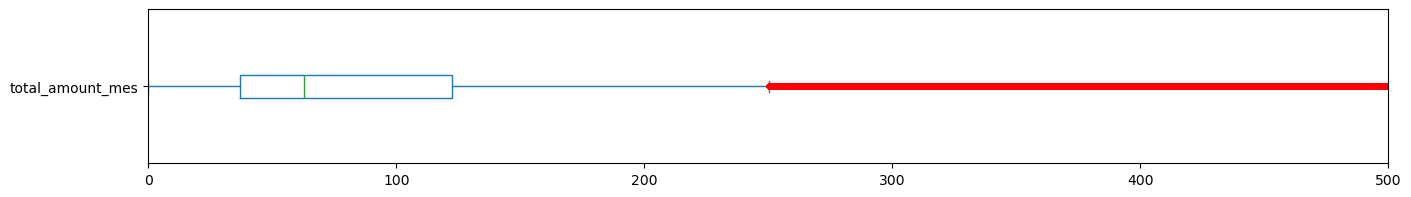

In [15]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
orderns_de['total_amount_mes'].plot(kind='box', xlim=(0, 500), vert=False, flierprops=red_square, figsize=(16,2))

In [19]:
orderns_de['total_amount_mes'].describe().round(2)

count    554376.00
mean        106.24
std         231.89
min           0.00
25%          37.10
50%          62.90
75%         122.40
max      140338.90
Name: total_amount_mes, dtype: float64

In [20]:
pb_drop_dj = publico_janeiro_dezembro.drop(
    publico_janeiro_dezembro[
        (publico_janeiro_dezembro['total_amount_mes'] == 0) |
        (publico_janeiro_dezembro['total_amount_mes'] > lim_sup)
    ].index,
    axis=0
)

In [21]:
pb_drop_dj

,customer_id,is_target,order_created_month,num_pedidos_mes,num_pedidos_hist,total_amount_mes,ticket_medio
0,ffffeda85b466b48195c356f8b97f21d0b23958d5815fc...,target,12,1,2,167.00,167.000000
1,ffffeda85b466b48195c356f8b97f21d0b23958d5815fc...,target,1,1,2,167.00,167.000000
2,ffffe95dc11472a22c46b6d5cdc5c14cf40e0c88a601e0...,target,12,2,4,209.00,104.500000
3,ffffe95dc11472a22c46b6d5cdc5c14cf40e0c88a601e0...,target,1,2,4,209.00,104.500000
4,ffffe50aaaed54af0eb463fcc6761b0e17a1d1cdd6b8e1...,control,12,1,2,55.60,55.600000
...,...,...,...,...,...,...,...
1108746,000022ced2f3aa411b66ac41167b272ae528c4acdffeeb...,target,12,2,4,68.65,34.325000
1108747,000022ced2f3aa411b66ac41167b272ae528c4acdffeeb...,target,1,2,4,68.65,34.325000
1108748,000021924bf8192f64a7cc17ce7c0bc511cba907308f80...,target,12,2,5,119.90,59.950000
1108749,000021924bf8192f64a7cc17ce7c0bc511cba907308f80...,target,1,3,5,173.90,57.966667


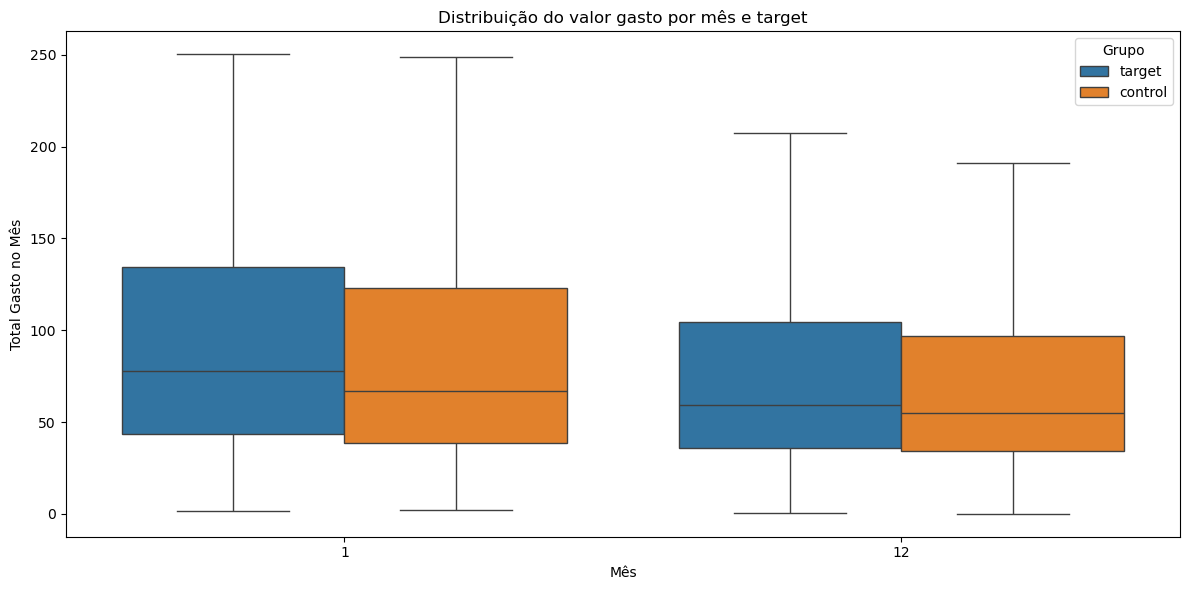

In [25]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=pb_drop_dj,
    x='order_created_month',               
    y='total_amount_mes',   
    hue='is_target',           
    showfliers=False          
)

plt.title('Distribuição do valor gasto por mês e target')
plt.xlabel('Mês')
plt.ylabel('Total Gasto no Mês')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

In [26]:
pb_drop_dj_1,clientes_retidos_1=retidos(pb_drop_dj, mes0=12, mes1=1,pedidos=1)
print(clientes_retidos_1)

           retidos    base  taxa_retencao
is_target                                
control      99248  222535       0.445988
target      148706  284879       0.521997


In [27]:
pb_drop_dj_s=analisar_retencao(pb_drop_dj_1)
pb_drop_dj_s

{'target_retencao': 0.521997,
 'control_retencao': 0.445988,
 'lift_absoluto': 0.076009,
 'lift_relativo_percent': 17.04,
 'target_success': 148706,
 'target_total': 284879,
 'control_success': 99248,
 'control_total': 222535,
 'z_stat': 53.746927,
 'p_value': 0.0,
 'significativo': True}

In [29]:
resultados_out, agg_out = calcula_viabilidade(
    pb_drop_dj,
    mes_campanha=12,
    mes_seguinte=1,
    coupon_value=10.0,   
    margin_rate=0.12     
)

resultados_out


{'pedidos_por_cliente_dec_control': 1.721477520390051,
 'pedidos_por_cliente_dec_target': 1.8417012134976605,
 'pedidos_por_cliente_jan_control': 2.1550245222735507,
 'pedidos_por_cliente_jan_target': 2.377355805974275,
 'inc_pedidos_dec': 34249.205468802684,
 'inc_pedidos_jan': 54690.82781497377,
 'inc_pedidos_total': 88940.03328377646,
 'inc_gmv_dec': 1239824.243831125,
 'inc_gmv_jan': 1887710.3009163789,
 'inc_gmv_total': 3127534.544747504,
 'margem_incremental': 375304.14536970045,
 'base_target_dec': 284879,
 'custo_campanha': 2848790.0,
 'lucro_incremental': -2473485.8546302994,
 'roi': -0.8682584025604904,
 'coupon_value': 10.0,
 'margin_rate': 0.12}